In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns 
sns.set(style="white")
sns.set(style="whitegrid",color_codes = True)

In [2]:
temp = pd.read_csv('calibrado.csv')
temp.head()

,celsius,calibrado
0,18.08,1
1,18.08,1
2,17.60,1
3,17.60,1
4,17.60,1


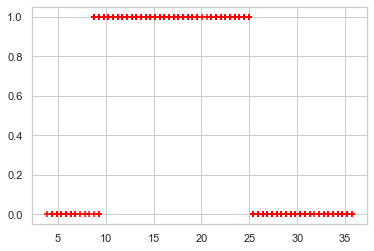

In [3]:
plt.scatter(temp.celsius,temp.calibrado,marker="+",color="red")
plt.show()

In [4]:

sns.set(style="white")
sns.set(style="whitegrid",color_codes = True)

In [5]:
model = LogisticRegression(solver = 'lbfgs')

In [6]:
X_train=temp[['celsius']]
Y_train =temp[['calibrado']]

In [101]:
model.fit(X_train,Y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [79]:
x_train,x_test,y_train,y_test = train_test_split(temp[['celsius']],temp.calibrado,test_size=0.1)

In [23]:
test_temp = pd.read_csv('calibrado_test.csv')

In [104]:
model.score(test_temp[['celsius']],test_temp[['calibrado']])

0.532

In [105]:
temp['calibrado'].value_counts()

1    754
0    230
Name: calibrado, dtype: int64

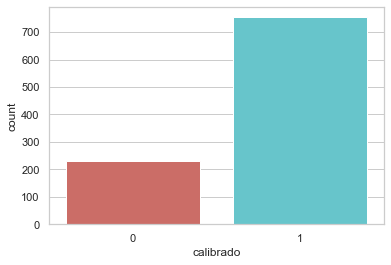

In [7]:
sns.countplot(x = 'calibrado',data = temp,palette='hls')
plt.show()

In [8]:
temp.groupby('calibrado').mean()

,celsius
calibrado,
0,21.025957
1,16.896804


In [27]:
import warnings
warnings.filterwarnings('ignore')

x = temp.loc[:,temp.columns != 'y']
y = temp.loc[:,temp.columns == 'y']

X_train=temp[['celsius']]
Y_train =temp[['calibrado']]

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_Y = os.fit_resample(X_train,Y_train)
os_data_X = pd.DataFrame(data= os_data_X,columns=columns)
os_data_Y = pd.DataFrame(data= os_data_Y,columns=['calibrado'])

print(len(os_data_X))
print(len(os_data_Y[os_data_Y['calibrado']==0]))
print(len(os_data_Y[os_data_Y['calibrado']==1]))
print("\n\n")
print(len(os_data_Y[os_data_Y['calibrado']==0])/len(os_data_X))
print(len(os_data_Y[os_data_Y['calibrado']==1])/len(os_data_X))


1508
754
754



0.5
0.5


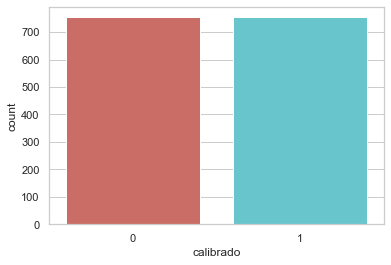

In [21]:
sns.countplot(x='calibrado',data=os_data_Y,palette='hls')
plt.show()

In [22]:
logre = LogisticRegression(solver='lbfgs')
logre.fit(os_data_X,os_data_Y)

LogisticRegression()

In [28]:
logre.predict(test_temp[['celsius']])

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
logre.score(test_temp[['celsius']],test_temp[['calibrado']])

0.545

In [32]:
test_temp = pd.read_csv('train_temp3.csv')

In [34]:
logre.score(test_temp[['celsius']],test_temp[['calibrado']])

0.548